In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

# print(pd.isna(y).sum())

mask = y.notna()
X = X[mask]
y = y[mask]

In [7]:
categorical_cols = [
    "Gender", "Subscription Type", "Contract Length"
]

numerical_cols = [
    "Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay",
    "Total Spend", "Last Interaction"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

MODEL 1 — Logistic Regression

In [9]:
lr_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("regressor", LogisticRegression(
            max_iter=300,
            random_state=42
        ))
    ]
)

In [10]:
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.8954484104029853


d:\Works\ML\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


METHOD 2 - Random Forest Classifier

In [11]:
rf_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("imputer", SimpleImputer(strategy="mean")),
        ("regressor", RandomForestClassifier(
            n_estimators=200,
            random_state=42
        ))
    ]
)


In [12]:
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9992854469359284


MODEL 2 — GRADIENT BOOSTING

In [13]:
gb_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("regressor", GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            random_state=42
        ))
    ]
)

In [14]:
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.9999659736636156


Accuracy Comparison Plot

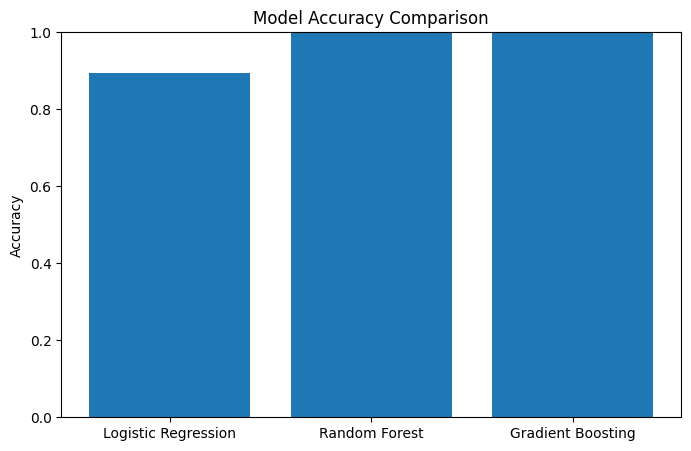

In [15]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [lr_acc, rf_acc, gb_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


Best Model Confusion Matrix (Gradient Boosting)

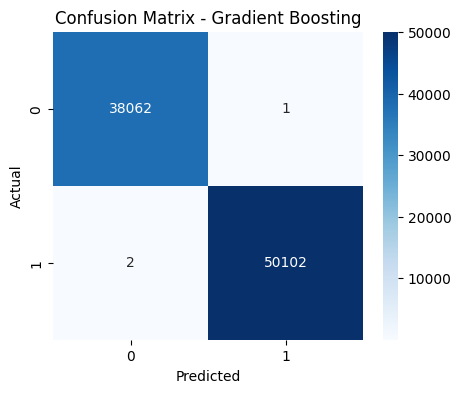

In [16]:
cm = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [ ]:
new_customer = pd.DataFrame([{
    "Age": 35, 
    "Gender": "Male", 
    "Tenure": 24,
    "Usage Frequency": 15, 
    "Support Calls": 3, 
    "Payment Delay": 5, 
    "Subscription Type": "Premium", 
    "Contract Length": "Monthly", 
    "Total Spend": 500, 
    "Last Interaction": 10
}])

prediction = gb_model.predict(new_customer)
preds = gb_model.predict_proba(new_customer)

print("Churn Prediction:", "Yes" if prediction[0]==1 else "No")
print("Churn Probability:", preds[0][1])
print("Stay Probability:", preds[0][0])

Churn Prediction: Yes
Churn Probability: 0.9996660287887207
Stay Probability: 0.00033397121127931584
